In [4]:
library(devtools)

In [28]:
library(dplyr)

In [5]:
install.packages('devtools')

Warning message:
"패키지 'devtools'가 사용중이므로 설치되지 않을 것입니다"


In [6]:
install_github('saurfang/rCharts', ref='utf8-writelines')


Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.




bitops  (NA -> 1.0-7   ) [CRAN]
RJSONIO (NA -> 1.3-1.6 ) [CRAN]
RCurl   (NA -> 1.98-1.7) [CRAN]


Installing 3 packages: bitops, RJSONIO, RCurl



package 'bitops' successfully unpacked and MD5 sums checked
package 'RJSONIO' successfully unpacked and MD5 sums checked
package 'RCurl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\NOTEBOOK\AppData\Local\Temp\RtmpqkqDkD\downloaded_packages



Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.



v  checking for file 'C:\Users\NOTEBOOK\AppData\Local\Temp\RtmpqkqDkD\remotes4d14737d6a05\saurfang-rCharts-e0106ed/DESCRIPTION' (536ms)
-  preparing 'rCharts': (5.8s)
v  checking DESCRIPTION meta-information
-  checking for LF line-endings in source and make files and shell scripts
-  checking for empty or unneeded directories
-  building 'rCharts_0.4.5.tar.gz'
   


In [14]:
# 개발자 제공 기본 예제 해보기
library('rCharts')

In [15]:
hair_eye_male <- subset(as.data.frame(HairEyeColor), Sex == 'Male')
n1 <- nPlot(Freq ~ Hair, group='Eye', data=hair_eye_male, type='multiBarChart')
n1

In [16]:
head(subset(as.data.frame(HairEyeColor), Sex == 'Male'))

,Hair,Eye,Sex,Freq
,<fct>,<fct>,<fct>,<dbl>
1,Black,Brown,Male,32
2,Brown,Brown,Male,53
3,Red,Brown,Male,10
4,Blond,Brown,Male,3
5,Black,Blue,Male,11
6,Brown,Blue,Male,50


### nPlot()
- D3.js의 NVD3 라이브러리 기반


In [24]:
# 데이터 적재
df <- read.csv('rggagi/example_studentlist2.csv')
head(df)

,sex,age,grade,absence,bloodtype,height,weight
,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,남자,20,2,무,O,157.1,52.3
2,여자,24,2,유,O,160.8,53.6
3,남자,28,2,무,O,160.5,53.4
4,남자,22,2,무,AB,159.0,52.2
5,여자,23,2,무,O,160.9,53.1
6,남자,25,2,유,A,161.5,50.1


In [42]:
# 산포도 그리기 type='scatterChart'
n1 <- nPlot(data=df, height~weight, group='sex', type='scatterChart')
n1

### ㄴ 예시
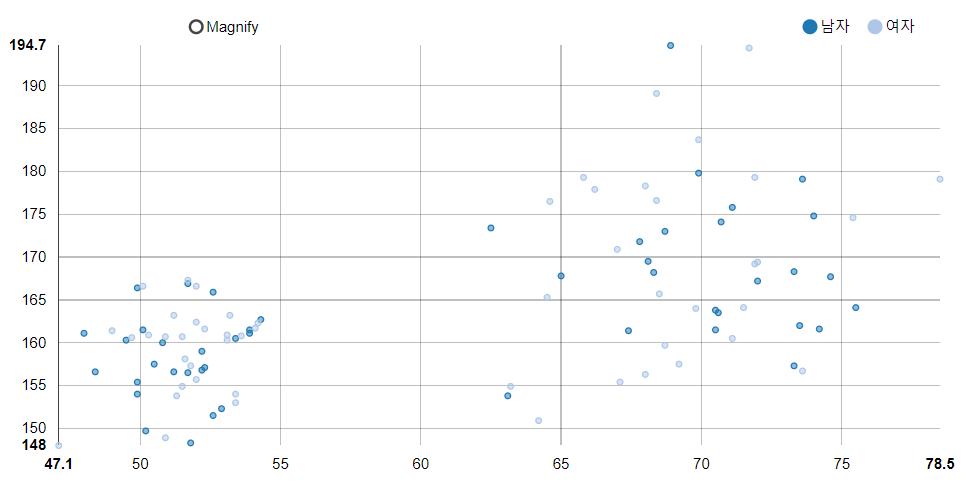

In [43]:
# 파이 차트 그리기 
n2 <- nPlot( data=df, ~bloodtype, type='pieChart')
n2

### ㄴ 예시
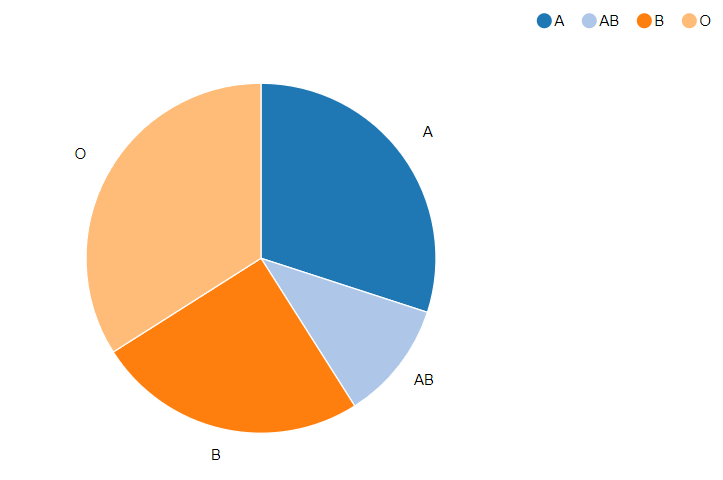

In [44]:
# 파이 차트 => 도넛 차트
n2$chart(donut=T)
n2


### ㄴ 예시
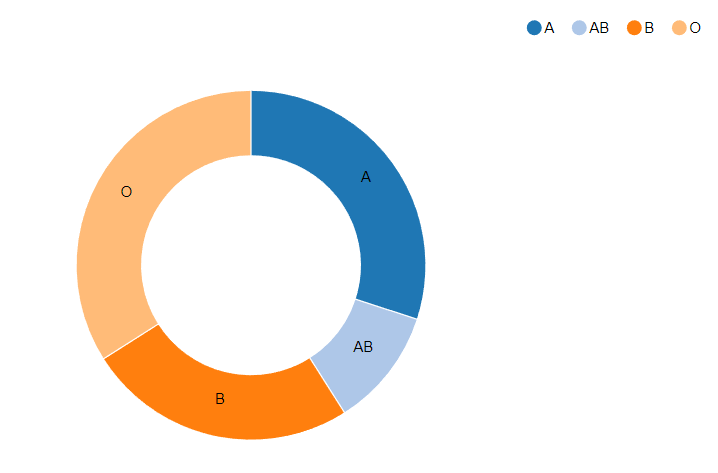

In [45]:
# 멀티 막대그래프
# 도수를 자동으로 처리해 주지 않음
df2 <- df %>% 
    group_by(bloodtype, sex) %>% 
        summarize(n=n())

`summarise()` has grouped output by 'bloodtype'. You can override using the `.groups` argument.


In [46]:
n4 <- nPlot(data=df2, n~bloodtype, group='sex', type='multiBarChart')
n4

### ㄴ 예시
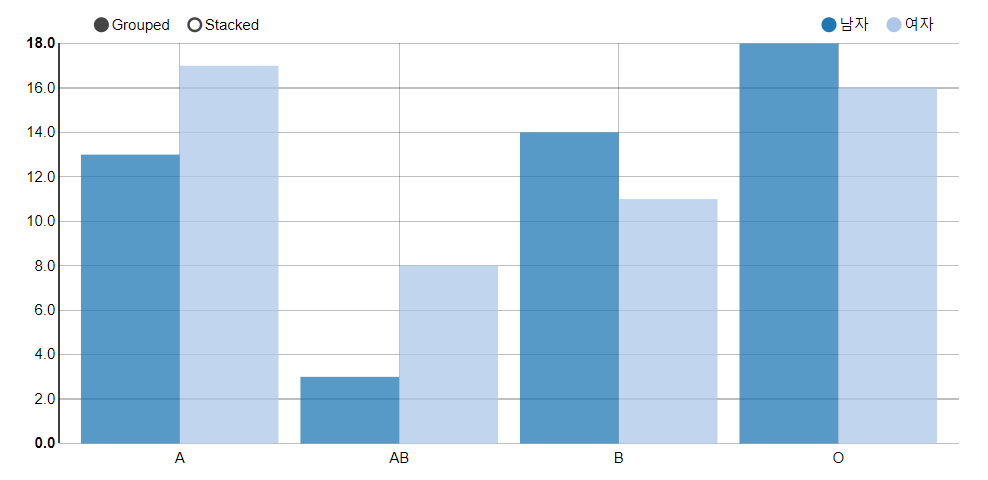

In [47]:
# 라인차트
ts <- read.csv('rggagi/example_ts2.csv')

In [48]:
ts$time <- as.Date(ts$time)
ts2 <- ts %>% filter(year == 2014)
head(ts2)

,time,sales,year
,<date>,<int>,<int>
1,2014-01-01,4510,2014
2,2014-01-08,5063,2014
3,2014-01-15,3694,2014
4,2014-01-22,3768,2014
5,2014-01-29,3850,2014
6,2014-02-05,4300,2014


In [49]:
n5 <- nPlot(data=ts2, sales~time, type='lineChart') # x축 time 값이 이상함
n5

### 예시
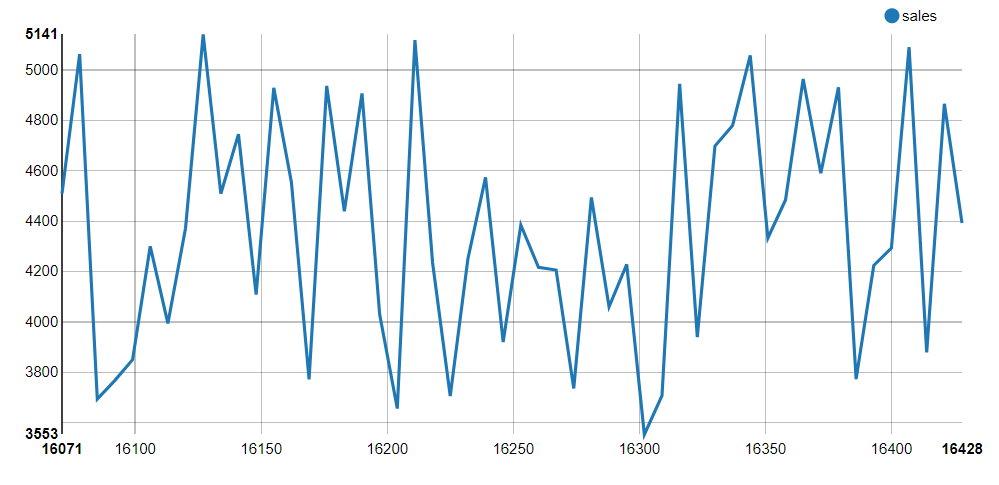

In [50]:
# x축 time 값 변환 xAxis()
n5$xAxis(tickFormat = "#! 
    function(d) { 
        return d3.time.format('%Y-%m-%d')
               (new Date(d*1000*3600*24));
    } !#", rotateLabels = -45)
n5

예시
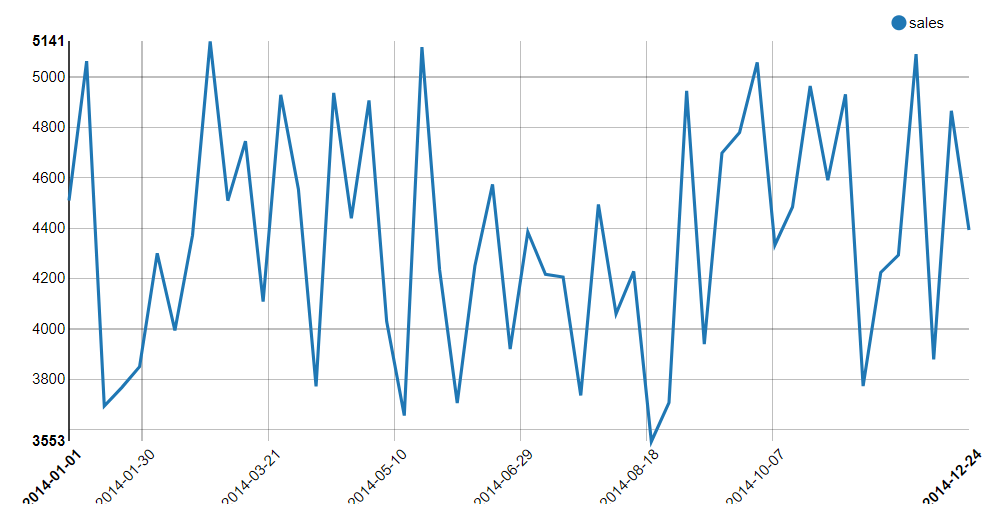

In [52]:
# 누적 영역 차트
ts3 <- read.csv('rggagi/example_ts3.csv')
head(ts3$time)

[1] "2014-01-01" "2014-01-08" "2014-01-15" "2014-01-22" "2014-01-29"
[6] "2014-02-05"

In [53]:
ts3$time <- as.Date(ts3$time)
head(ts3$time)
n6 <- nPlot(data=ts3, sales~time, group='product', type='stackedAreaChart') # x축 time 값이 이상함
n6

[1] "2014-01-01" "2014-01-08" "2014-01-15" "2014-01-22" "2014-01-29"
[6] "2014-02-05"

### 예시
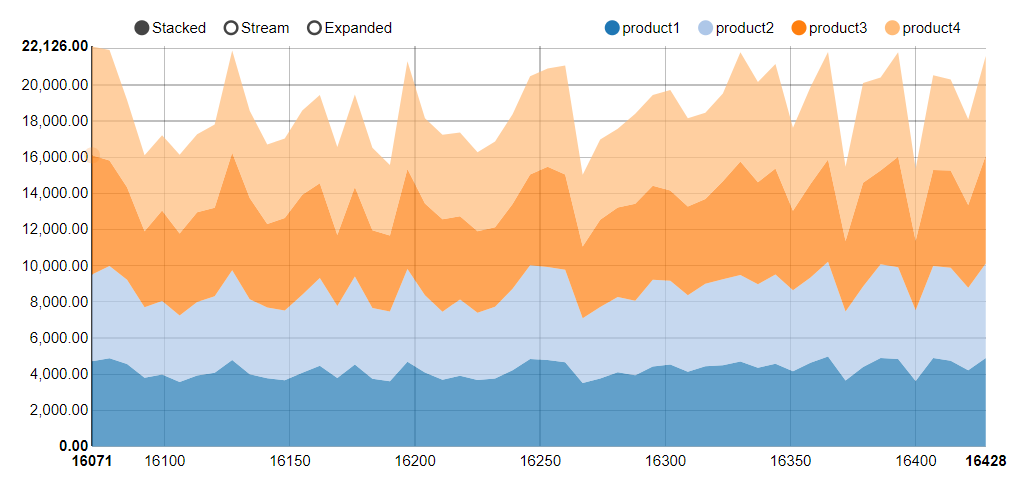

In [54]:
# x축 time 값 변환 xAxis()
n6$xAxis(tickFormat = "#! 
    function(d) { 
        return d3.time.format('%Y-%m-%d')
                (new Date(d*1000*3600*24));
    } !#", rotateLabels = -45)
n6

### ㄴ 예시
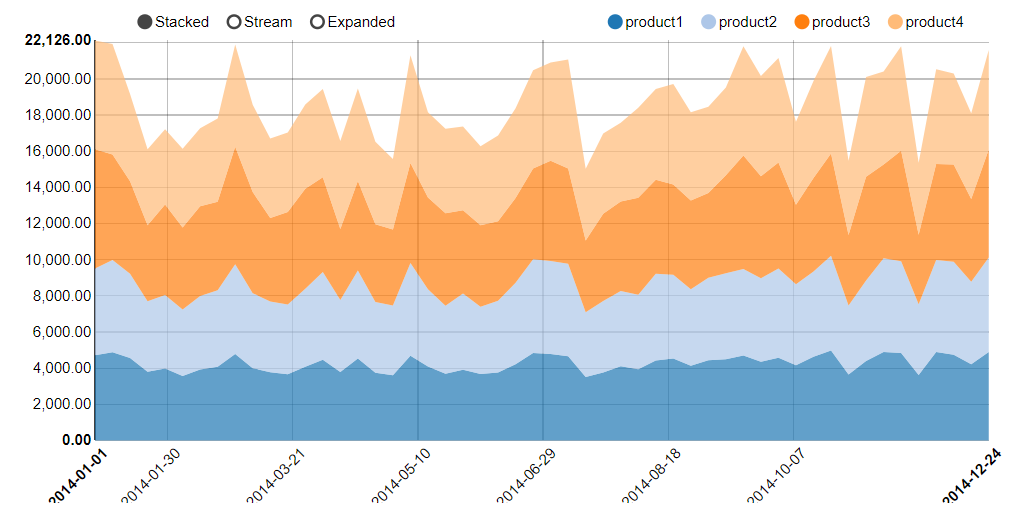

In [55]:
# 라인포커스 - 2개 그래프, 아래 그래프는 네비게이터
n7 <- nPlot(data=ts3, sales~time, group='product', type='lineWithFocusChart') # x축 time 값이 이상함
n7$xAxis(tickFormat = "#! 
    function(d) { 
        return d3.time.format('%Y-%m-%d')
                (new Date(d*1000*3600*24));
    } !#", rotateLabels = -15)
n7

### ㄴ 예시
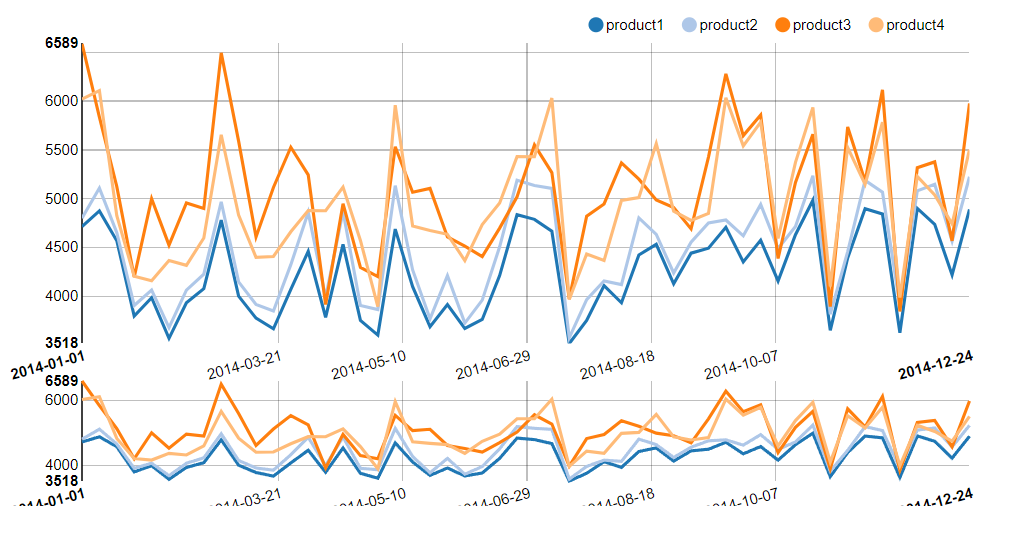

In [41]:
head(ts3)

,time,sales,product
,<date>,<int>,<chr>
1,2014-01-01,4716,product1
2,2014-01-08,4875,product1
3,2014-01-15,4570,product1
4,2014-01-22,3798,product1
5,2014-01-29,3987,product1
6,2014-02-05,3571,product1


In [56]:
install.packages('devtools')
install_github('saurfang/rCharts', ref='utf8-writelines')

Warning message:
"패키지 'devtools'가 사용중이므로 설치되지 않을 것입니다"

Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.

Skipping install of 'rCharts' from a github remote, the SHA1 (e0106ed8) has not changed since last install.
  Use `force = TRUE` to force installation



In [57]:
library(dplyr)
library(rCharts)

In [58]:
# data load - 2015년 예산안
DF <- read.csv("rggagi/example_2015_expenditure.csv")
str(DF)

'data.frame':	62 obs. of  6 variables:
 $ 소관명     : chr  "A부서" "A부서" "A부서" "A부서" ...
 $ 회계명     : chr  "과학관관련" "과학관관련" "과학관관련" "과학관" ...
 $ 분야명     : chr  "기술" "기술" "기술" "기술" ...
 $ 부문명     : chr  "기술일반" "기술일반" "기술일반" "기술일반" ...
 $ 프로그램명 : chr  "계정간거래" "과학관관련운영" "회계기금간거래" "계정간거래" ...
 $ sum.확정안.: num  1301000 25336500 486000 1501000 31113145 ...


In [59]:
# 원본 복사
DF2 <- DF

In [60]:
# sum.확정안 이름 및 단위 변경(원 => 천원)
colnames(DF2)[6] <- "value"
DF2['value'] <- round(DF2['value']/1000)
head(DF2)

,소관명,회계명,분야명,부문명,프로그램명,value
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,A부서,과학관관련,기술,기술일반,계정간거래,1301
2,A부서,과학관관련,기술,기술일반,과학관관련운영,25336
3,A부서,과학관관련,기술,기술일반,회계기금간거래,486
4,A부서,과학관,기술,기술일반,계정간거래,1501
5,A부서,과학관,기술,기술일반,과학관운영,31113
6,A부서,과학관,기술,기술일반,회계기금간거래,419


In [61]:
# 데이터 전처리
DF3 <- DF2

In [64]:
# Sankey Diagram은 모든 노드 1차원, 각각은 sum으로 합산되어 있어야 함
sum1 <- DF3 %>% group_by(소관명,회계명) %>% summarise(sum(value)) # 소관명노드 => 회계명노드
sum2 <- DF3 %>% group_by(회계명,분야명) %>% summarise(sum(value))
sum3 <- DF3 %>% group_by(분야명,부문명) %>% summarise(sum(value))
sum4 <- DF3 %>% group_by(부문명,프로그램명) %>% summarise(sum(value))

`summarise()` has grouped output by '소관명'. You can override using the `.groups` argument.
`summarise()` has grouped output by '회계명'. You can override using the `.groups` argument.
`summarise()` has grouped output by '분야명'. You can override using the `.groups` argument.
`summarise()` has grouped output by '부문명'. You can override using the `.groups` argument.


In [63]:
sum1

소관명,회계명,sum(value)
<chr>,<chr>,<dbl>
A부서,과학관,33033
A부서,과학관관련,27123
A부서,발전균형특별회계,3499882
A부서,보험특별회계,609665
A부서,사업특별회계,1110638
A부서,에너지및자원사업특별회계,579411
A부서,예금특별회계,1115288
A부서,일반회계,6763710


In [65]:
# Sankey Diagram은 'source', 'target', 'value' 구성되어야 함
colnames(sum1) <- c("source", "target", "value")
colnames(sum2) <- c("source", "target", "value")
colnames(sum3) <- c("source", "target", "value")
colnames(sum4) <- c("source", "target", "value")

In [66]:
head(sum1)

source,target,value
<chr>,<chr>,<dbl>
A부서,과학관,33033
A부서,과학관관련,27123
A부서,발전균형특별회계,3499882
A부서,보험특별회계,609665
A부서,사업특별회계,1110638
A부서,에너지및자원사업특별회계,579411


In [67]:
# 하나의 객체로 bind
sum1 <- as.data.frame(sum1)
sum2 <- as.data.frame(sum2)
sum3 <- as.data.frame(sum3)
sum4 <- as.data.frame(sum4)
DF4 <- rbind(sum1, sum2, sum3, sum4)

In [68]:
head(DF4)
tail(DF4)

,source,target,value
,<chr>,<chr>,<dbl>
1,A부서,과학관,33033
2,A부서,과학관관련,27123
3,A부서,발전균형특별회계,3499882
4,A부서,보험특별회계,609665
5,A부서,사업특별회계,1110638
6,A부서,에너지및자원사업특별회계,579411


,source,target,value
,<chr>,<chr>,<dbl>
76,정운사업,회계간거래,108173
77,정운사업,회계간거래(전출금),978939
78,정운사업,회계기금간거래,234343
79,정운사업,회계기금간거래(전출금),26000
80,평생·직업교육,연구공동체활성화,26600
81,평생·직업교육,평생직업교육체제구축,17974


In [69]:
# library load
sankeyPlot <- rCharts$new() # rChart 객체 생성
sankeyPlot$setLib('rggagi/libraries/sankey') # rChart 속성 지정
sankeyPlot$setTemplate(script = "rggagi/libraries/sankey/layouts/chart.html") # rChart 속성 지정

In [70]:
# 그래프 속성 지정 
sankeyPlot$set(
  data = DF4,
  nodeWidth = 15,
  nodePadding = 13,
  layout = 300,
  width = 900,
  height = 600,
  units = "천원",
  title = "Sankey Diagram"
)

In [71]:
# 그래프 실행 - 라인두께가 예산 금액
# 예산이 어디로 흘러가는 지 한눈에 알 수 있음
sankeyPlot

### 멋있다.
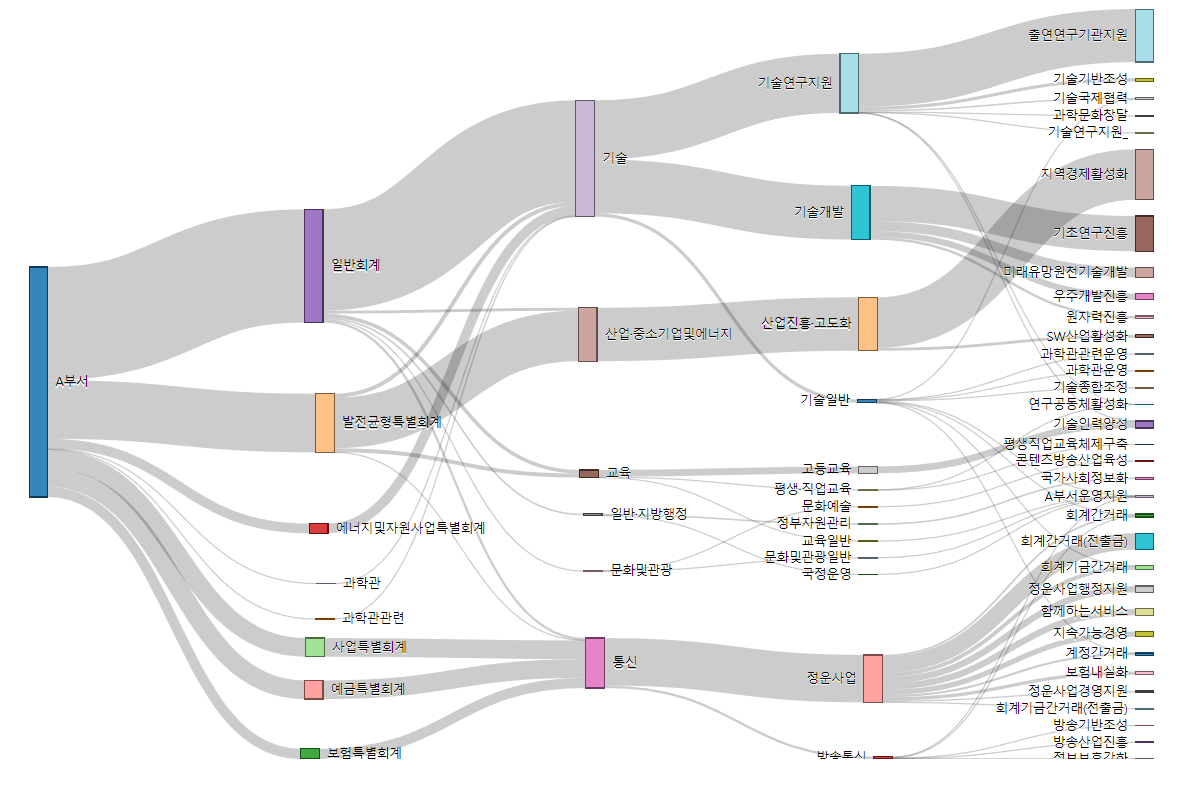

In [72]:
# library load
library(readxl)
library(dplyr)
library(stringr)
library(rCharts)

In [73]:
# data load - sprint()
files <- sprintf("%4d년_%02d월_전국_실거래가_아파트(매매).xls", 
                 rep(2006:2014, each=12), 1:12)

In [75]:
head(files)

[1] "2006년_01월_전국_실거래가_아파트(매매).xls"
[2] "2006년_02월_전국_실거래가_아파트(매매).xls"
[3] "2006년_03월_전국_실거래가_아파트(매매).xls"
[4] "2006년_04월_전국_실거래가_아파트(매매).xls"
[5] "2006년_05월_전국_실거래가_아파트(매매).xls"
[6] "2006년_06월_전국_실거래가_아파트(매매).xls"

In [78]:
DF <- NULL
for(i in 1:length(files)){
  t <- read_excel(path=paste0("./rggagi/rawdata","/",files[i]), sheet=1, col_names=T)
  t <- mutate(t, date=paste0(substr(files[i], 1,4), "-", month=substr(files[i], 7,8),"-10"))
  DF <- rbind(DF, t)
}

In [79]:
head(DF)

시군구,본번,부번,단지명,전용면적(m2),계약일,거래금액(만원),층,건축년도,도로명주소,date
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
서울특별시 강남구 개포동,12,0,대청,39.53,21~31,"22,300",15,1992,개포로109길,2006-01-10
서울특별시 강남구 개포동,12,0,대청,39.53,1~10,"24,800",5,1992,개포로109길,2006-01-10
서울특별시 강남구 개포동,12,0,대청,39.53,11~20,"23,720",15,1992,개포로109길,2006-01-10
서울특별시 강남구 개포동,12,0,대청,51.12,11~20,"33,700",8,1992,개포로109길,2006-01-10
서울특별시 강남구 개포동,12,0,대청,60.00,11~20,"44,000",14,1992,개포로109길,2006-01-10
서울특별시 강남구 개포동,12,0,대청,60.00,11~20,"44,000",7,1992,개포로109길,2006-01-10


In [104]:
# 변수명 변경 - 한글 변수명 깨진 경우만
DF2 <- DF #안전을 위해 새로운 객체에 복사합니다.
colnames(DF2) <- c("시군구", "본번", "부번", "단지명", "전용면적", "계약일", "거래금액", "층", "건축년도", "도로명주소", "date")

In [122]:
# 필요한 데이타 불러오기
DF3 <- data.frame(date=DF2$date, addr = DF2$시군구,  val=DF2$거래금액)
head(DF3,3)

,date,addr,val
,<chr>,<chr>,<chr>
1,2006-01-10,서울특별시 강남구 개포동,"22,300"
2,2006-01-10,서울특별시 강남구 개포동,"24,800"
3,2006-01-10,서울특별시 강남구 개포동,"23,720"


In [123]:
DF3$val  <- gsub(',','', DF3$val)

In [124]:
DF3$val  <- as.integer(DF3$val)

In [125]:
# 데이터형 변환
str(DF3)
DF3[['val']] <- as.integer(DF3[['val']])
head(DF3,3)

'data.frame':	588766 obs. of  3 variables:
 $ date: chr  "2006-01-10" "2006-01-10" "2006-01-10" "2006-01-10" ...
 $ addr: chr  "서울특별시 강남구 개포동" "서울특별시 강남구 개포동" "서울특별시 강남구 개포동" "서울특별시 강남구 개포동" ...
 $ val : int  22300 24800 23720 33700 44000 44000 45250 15900 18400 24700 ...


,date,addr,val
,<chr>,<chr>,<int>
1,2006-01-10,서울특별시 강남구 개포동,22300
2,2006-01-10,서울특별시 강남구 개포동,24800
3,2006-01-10,서울특별시 강남구 개포동,23720


In [126]:
# 주소 변환 서울특별시 강남구 개포동 = > 강남구
City <- str_split_fixed(DF3[,2], " ", 4)
City <- data.frame(City)
str(City)

'data.frame':	588766 obs. of  4 variables:
 $ X1: chr  "서울특별시" "서울특별시" "서울특별시" "서울특별시" ...
 $ X2: chr  "강남구" "강남구" "강남구" "강남구" ...
 $ X3: chr  "개포동" "개포동" "개포동" "개포동" ...
 $ X4: chr  "" "" "" "" ...


In [127]:
DF4 <- data.frame(date=DF3[,1], addr=City[,2], val=DF3[,3])
str(DF4)

'data.frame':	588766 obs. of  3 variables:
 $ date: chr  "2006-01-10" "2006-01-10" "2006-01-10" "2006-01-10" ...
 $ addr: chr  "강남구" "강남구" "강남구" "강남구" ...
 $ val : int  22300 24800 23720 33700 44000 44000 45250 15900 18400 24700 ...


In [128]:
head(DF4)

,date,addr,val
,<chr>,<chr>,<int>
1,2006-01-10,강남구,22300
2,2006-01-10,강남구,24800
3,2006-01-10,강남구,23720
4,2006-01-10,강남구,33700
5,2006-01-10,강남구,44000
6,2006-01-10,강남구,44000


In [129]:
# 구별 평균 구하기 - 중앙값, 또는 면적별 평균등 다양하게
DF5 <- DF4 %>% group_by(date, addr) %>% summarise(mean(val))
head(DF5)

`summarise()` has grouped output by 'date'. You can override using the `.groups` argument.


date,addr,mean(val)
<chr>,<chr>,<dbl>
2006-01-10,강남구,76892.96
2006-01-10,강동구,39031.67
2006-01-10,강북구,18964.91
2006-01-10,강서구,25348.86
2006-01-10,관악구,24570.44
2006-01-10,광진구,37802.83


In [136]:
# 최종 데이터 정리
colnames(DF5)[3] <- "val"
DF5[['date']] <- as.character(DF5[['date']])
DF5$val <- DF5$val/50
head(DF5)

date,addr,val
<chr>,<chr>,<dbl>
2006-01-10,강남구,30.757182
2006-01-10,강동구,15.612668
2006-01-10,강북구,7.585963
2006-01-10,강서구,10.139542
2006-01-10,관악구,9.828177
2006-01-10,광진구,15.121132


In [137]:
# 그래프 그리기
g2 <- rCharts$new()

In [138]:
g2$setLib('rggagi/libraries/nyt_home')
g2$setTemplate(script = "rggagi/libraries/nyt_home/layouts/nyt_home.html")

In [139]:
g2$set(
  description = "This data comes from the 'rt.molit.go.kr' dataset",
  data = DF5,
  groups = "addr"
)

In [141]:
g2

### html로 출력가능
#cat(g2$html())

In [135]:
cat(g2$html())

<!--Attribution:NYT Interactive http://www.nytimes.com/interactive/2011/05/31/business/economy/case-shiller-index.html-->

<div id="interactiveFreeFormMain">
<div class="g-shell">
<div class="g-tooltip">
<span class="g-playername-tooltip"></span>
<span class="g-dltype-tooltip"></span>
<span class="g-salary-tooltip"></span>
</div>
<h5 class="g-intro-sentence">
If you bought
<span class="g-selector g-city-selector"></span>
around
<span class="g-selector g-month-selector"></span>
<span class="g-selector g-date-selector"></span>
it would be worth
<span class="g-answer">24 percent less</span> today.
</h5>
<div class="g-chart"></div>
<div class="g-table-container">
<div class="g-table-intro">
<h4 style = "text-indent:0px;font-family:arial,sans-serif;">Behind the data </h4>
<p class="g-table-readin"></p>
</div>
<table class="g-table">
<tr>
<th class="g-proper-city"></th>
<th class="g-yoy-chg" colspan="2">Year-over-year change</th>
<th class="g-peak-month-td" colspan="2">Since peak</th>
<th cl